In [21]:
# Uncomment and run these if you haven't got them installed
# ! pip install nibabel 
# ! pip install neuromaps



import nibabel as nib
from neuromaps.datasets import fetch_atlas,fetch_annotation
import numpy as np
x
fslr = fetch_atlas('fslr','32k')

fslr_nib=nib.load(fslr['sphere'].L) # use spherical projection 
np.savetxt('fslr_vCoords.txt',fslr_nib.agg_data()[0])
np.savetxt('fslr_vTris.txt',fslr_nib.agg_data()[1]+1)

fslr_nib=nib.load(fslr['midthickness'].L)
np.savetxt('fslr_vCoordsMid.txt',fslr_nib.agg_data()[0])
np.savetxt('fslr_vTrisMid.txt',fslr_nib.agg_data()[1]+1)

grad = fetch_annotation(source='margulies2016', desc='fcgradient01')
grad_nib=nib.load(grad[0])
np.savetxt('FC1Vals.txt',grad_nib.agg_data())

myelin = fetch_annotation(source='hcps1200', desc='myelinmap')
myelin_nib=nib.load(myelin[0])
np.savetxt('MyelinVals.txt',myelin_nib.agg_data())


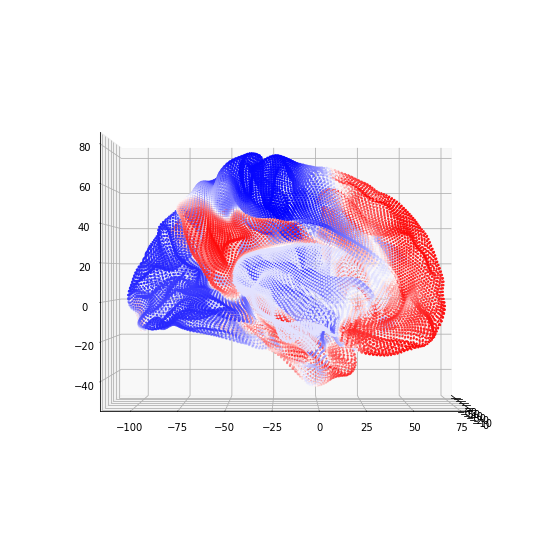

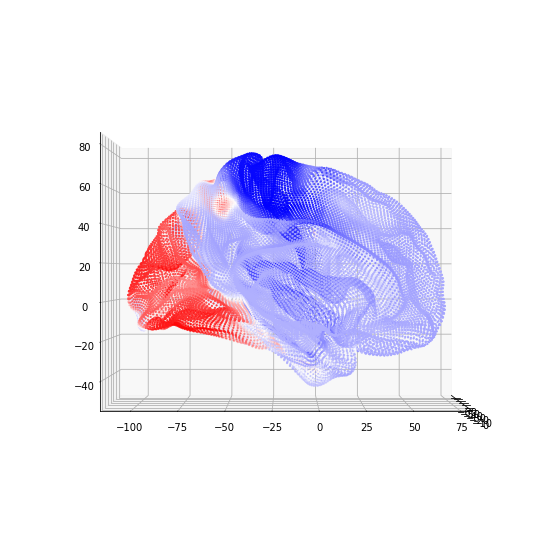

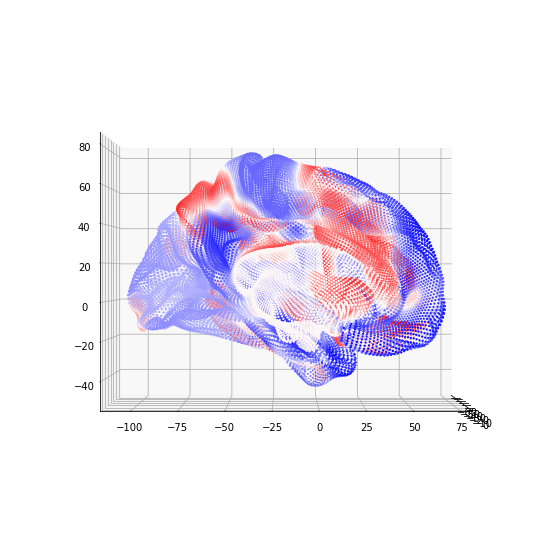

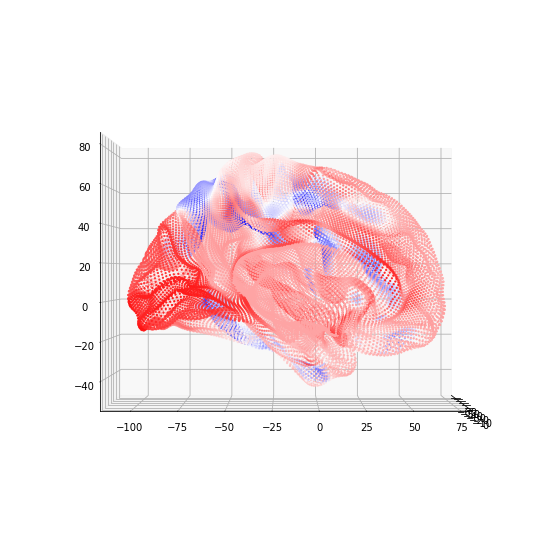

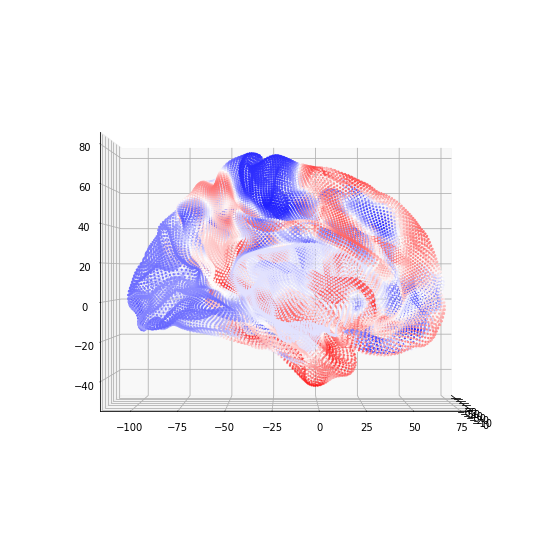

In [76]:

import nibabel as nib
from neuromaps.datasets import fetch_atlas,fetch_annotation
import numpy as np


fslr = fetch_atlas('fslr','32k')
fslr_nib=nib.load(fslr['midthickness'].L).agg_data()
fslr_nib[0].shape




for i in range(5):
    names=['fcgradient01','fcgradient02','fcgradient03','fcgradient04','fcgradient05']
    grad = fetch_annotation(source='margulies2016', desc=names[i])
    grad_nib=nib.load(grad[0])
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(fslr_nib[0][:,0],fslr_nib[0][:,1],fslr_nib[0][:,2],c=grad_nib.agg_data(),s=1.5,cmap='bwr')
    ax.view_init(elev=.0, azim=0)
    plt.savefig('Gradient'+str(i+1)+'.png')
    
    

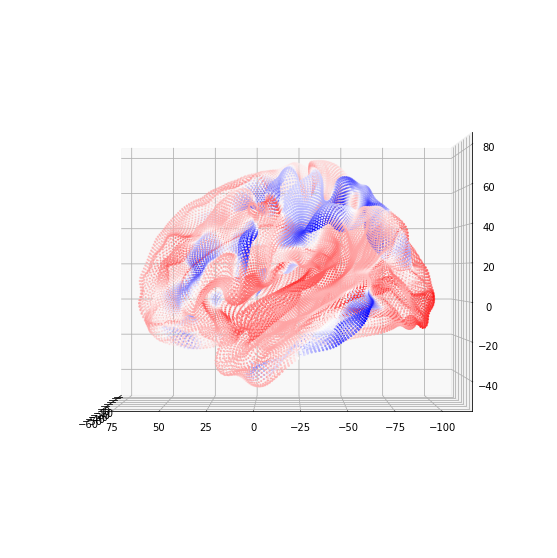

In [74]:
fslr = fetch_atlas('fslr','32k')
fslr_nib=nib.load(fslr['midthickness'].L).agg_data()
fslr_nib[0].shape




i=3
names=['fcgradient01','fcgradient02','fcgradient03','fcgradient04','fcgradient05']
grad = fetch_annotation(source='margulies2016', desc=names[i])
grad_nib=nib.load(grad[0])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(fslr_nib[0][:,0],fslr_nib[0][:,1],fslr_nib[0][:,2],c=grad_nib.agg_data(),s=1,cmap='bwr')
ax.view_init(elev=.0, azim=180)
plt.savefig('Gradient'+str(i+1)+'.png')

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import nibabel as nib

def write_plyRGB(filename, vertices, faces, colorsR,colorsG,colorsB,comment=None):
    import pandas as pd
    print("writing ply format")
    # infer number of vertices and faces
    number_vertices = vertices.shape[0]
    number_faces = faces.shape[0]
    # make header dataframe
    header = ['ply',
            'format ascii 1.0',
            'comment %s' % comment,
            'element vertex %i' % number_vertices,
            'property float x',
            'property float y',
            'property float z',
            'property uchar red',
            'property uchar green',
            'property uchar blue',
            'element face %i' % number_faces,
            'property list uchar int vertex_indices',
            'end_header'
             ]
    header_df = pd.DataFrame(header)
    # make dataframe from vertices
    vertex_df = pd.DataFrame(vertices/50)
    #colors_df = pd.DataFrame(np.tile(np.round(colors/7*255), (3,1)).T)
    ColorsR_df=pd.DataFrame(colorsR)
    ColorsG_df=pd.DataFrame(colorsG)
    ColorsB_df=pd.DataFrame(colorsB)
    colorsConcat = pd.concat([ColorsR_df,ColorsG_df,ColorsB_df], axis=1)
    colors_df=pd.DataFrame(colorsConcat)
    colors_df=colorsConcat.astype(int)
    df_concat = pd.concat([vertex_df, colors_df], axis=1)
    # make dataframe from faces, adding first row of 3s (indicating triangles)
    triangles = np.reshape(3 * (np.ones(number_faces)), (number_faces, 1))
    triangles = triangles.astype(int)
    faces = faces.astype(int)
    faces_df = pd.DataFrame(np.concatenate((triangles, faces), axis=1))
    # write dfs to csv
    header_df.to_csv(filename, header=None, index=False)
    with open(filename, 'a') as f:
        df_concat.to_csv(f, header=False, index=False,
                         float_format='%.3f', sep=' ')
    with open(filename, 'a') as f:
        faces_df.to_csv(f, header=False, index=False,
                        float_format='%.0f', sep=' ')

In [12]:
SurfVal=grad_nib.agg_data()

# RESAMPLING ONTO SURFACE

cmap = matplotlib.cm.get_cmap('cividis')

colors=SurfVal

gt_zero=SurfVal[SurfVal>0]
lt_zero=SurfVal[SurfVal<0]

DataRange=np.array([np.percentile(np.abs(gt_zero), 75),np.percentile(np.abs(lt_zero), 75)]) # choose the upper and lower limits for the colorrange for the display


v1=DataRange.max()*-1
v2=DataRange.max()

norm = matplotlib.colors.Normalize(vmin=v1, vmax=v2)
CMap=cmap(norm(colors))*255

SaveName='FC1left.ply'
#print(SaveName)
write_plyRGB(SaveName,fslr_nib.agg_data()[0],fslr_nib.agg_data()[1],CMap[:,0],CMap[:,1],CMap[:,2]) # This can be imported straight into Blender and has the same color layer as matplotlib


writing ply format


In [20]:
SurfVal=myelin_nib.agg_data()

# RESAMPLING ONTO SURFACE

cmap = matplotlib.cm.get_cmap('plasma')

colors=SurfVal

gt_zero=SurfVal[SurfVal>0]




DataRange=np.array([np.percentile(gt_zero,25),np.percentile(gt_zero,75)])
norm = matplotlib.colors.Normalize(vmin=DataRange[0], vmax=DataRange[1])

norm = matplotlib.colors.Normalize(vmin=DataRange[0], vmax=DataRange[1])
CMap=cmap(norm(colors))*255

SaveName='Myelinleft.ply'
#print(SaveName)
write_plyRGB(SaveName,fslr_nib.agg_data()[0],fslr_nib.agg_data()[1],CMap[:,0],CMap[:,1],CMap[:,2]) # This can be imported straight into Blender and has the same color layer as matplotlib



writing ply format
